In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error,classification_report
from sklearn.linear_model import LogisticRegression

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/CSE-303_Project/insurance_csv.csv')

In [ ]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [ ]:
df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
# Display duplicate rows
print("Duplicate rows:")
print(df[df.duplicated()])

Duplicate rows:
     age   sex    bmi  children smoker     region    charges
581   19  male  30.59         0     no  northwest  1639.5631


In [ ]:
# Remove duplicate rows
df_no_duplicates = df.drop_duplicates()

# Verify the number of rows after dropping duplicates
print(f"Number of rows after dropping duplicates: {len(df_no_duplicates)}")

Number of rows after dropping duplicates: 1337


In [ ]:
df_copy = df.copy()

In [ ]:
df['sex'].value_counts()

,count
sex,
male,676
female,662


In [ ]:
# Define the mapping dictionary
sex_mapping = {
    'male': 1,
    'female': 2,
}

# Apply the mapping
df['sex'] = df['sex'].map(sex_mapping)
df

,age,sex,bmi,children,smoker,region,charges
0,19,2,27.900,0,yes,southwest,16884.92400
1,18,1,33.770,1,no,southeast,1725.55230
2,28,1,33.000,3,no,southeast,4449.46200
3,33,1,22.705,0,no,northwest,21984.47061
4,32,1,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,no,northwest,10600.54830
1334,18,2,31.920,0,no,northeast,2205.98080
1335,18,2,36.850,0,no,southeast,1629.83350
1336,21,2,25.800,0,no,southwest,2007.94500


In [ ]:
df['smoker'].value_counts()

,count
smoker,
no,1064
yes,274


In [ ]:
# Define the mapping dictionary
smoker = {"yes":1,"no":0}

# Apply the mapping
df['smoker'] = df['smoker'].map(smoker)
df

,age,sex,bmi,children,smoker,region,charges
0,19,2,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,northwest,10600.54830
1334,18,2,31.920,0,0,northeast,2205.98080
1335,18,2,36.850,0,0,southeast,1629.83350
1336,21,2,25.800,0,0,southwest,2007.94500


In [ ]:
df['region'].value_counts()

,count
region,
southeast,364
southwest,325
northwest,325
northeast,324


In [ ]:
# Define the mapping dictionary
region = {"southwest":1,"southeast":2,"northwest":3,"northeast":4}

# Apply the mapping
df['region'] = df['region'].map(region)
df

,age,sex,bmi,children,smoker,region,charges
0,19,2,27.900,0,1,1,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,3,21984.47061
4,32,1,28.880,0,0,3,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,3,10600.54830
1334,18,2,31.920,0,0,4,2205.98080
1335,18,2,36.850,0,0,2,1629.83350
1336,21,2,25.800,0,0,1,2007.94500


In [ ]:
correlation = df.corr()
correlation

,age,sex,bmi,children,smoker,region,charges
age,1.000000,0.020856,0.109272,0.042469,-0.025019,-0.002127,0.299008
sex,0.020856,1.000000,-0.046371,-0.017163,-0.076185,0.004588,-0.057292
bmi,0.109272,-0.046371,1.000000,0.012759,0.003750,-0.157566,0.198341
children,0.042469,-0.017163,0.012759,1.000000,0.007673,-0.016569,0.067998
smoker,-0.025019,-0.076185,0.003750,0.007673,1.000000,0.002181,0.787251
region,-0.002127,0.004588,-0.157566,-0.016569,0.002181,1.000000,0.006208
charges,0.299008,-0.057292,0.198341,0.067998,0.787251,0.006208,1.000000


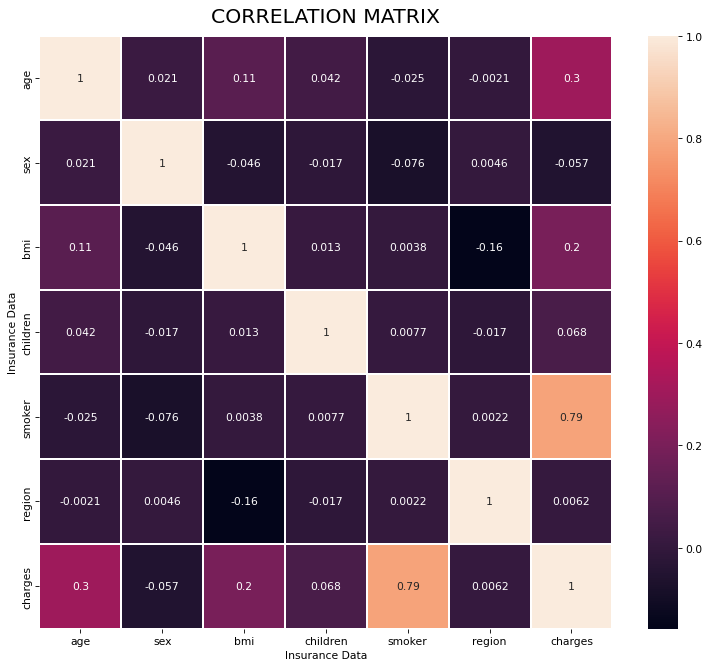

In [ ]:
#Correation matrix
plt.figure(figsize=(12,10), dpi=77)
sns.heatmap(correlation, linecolor='white',linewidths=0.1, annot=True)
plt.title('Correlation Matrix'.upper(), size=19, pad=13)
plt.xlabel('Insurance Data')
plt.ylabel('Insurance Data')
plt.show()


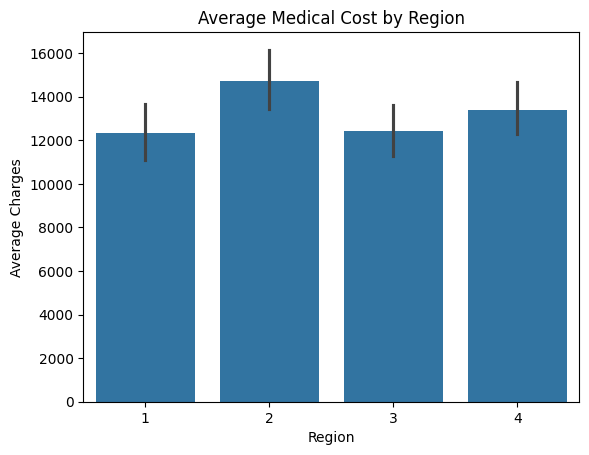

In [ ]:
#Bar plot
sns.barplot(x='region', y='charges', data=df)
plt.title('Average Medical Cost by Region')
plt.xlabel('Region')
plt.ylabel('Average Charges')
plt.show()

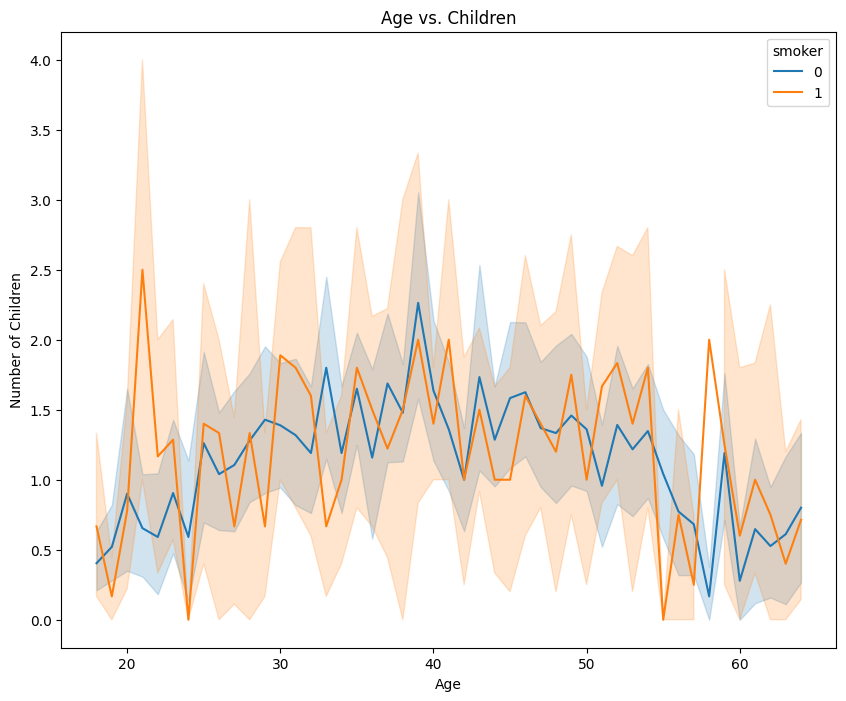

In [ ]:
#Line plot
plt.figure(figsize=(10, 8))
sns.lineplot(x='age', y='children', data=df,hue='smoker')
plt.title("Age vs. Children")
plt.xlabel("Age")
plt.ylabel("Number of Children")
plt.show()


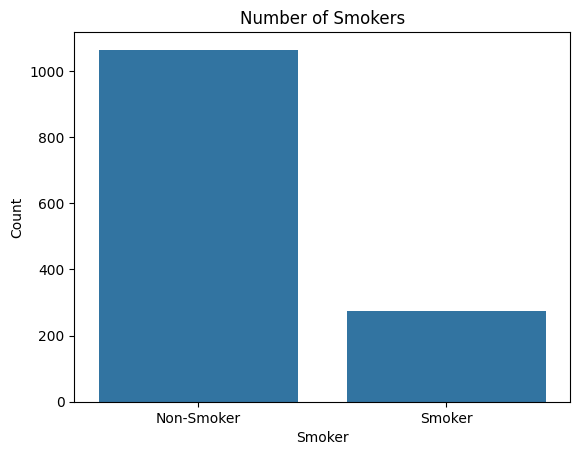

In [ ]:
#Count plot
sns.countplot(x='smoker', data=df)
plt.title('Number of Smokers')
plt.xlabel('Smoker')
plt.ylabel('Count')
plt.xticks([0, 1], ['Non-Smoker', 'Smoker'])
plt.show()

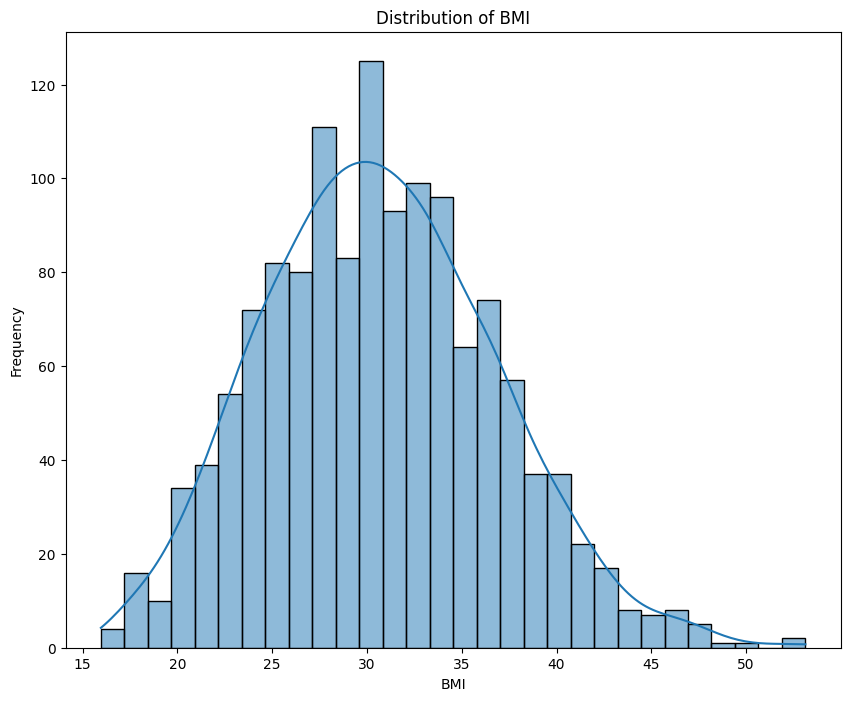

In [ ]:
#Histrogram
plt.figure(figsize=(10, 8))
sns.histplot(df['bmi'], kde=True, bins=30)
plt.title("Distribution of BMI")
plt.xlabel("BMI")
plt.ylabel("Frequency")
plt.show()

[np.int64(274), np.int64(1064)]
Show


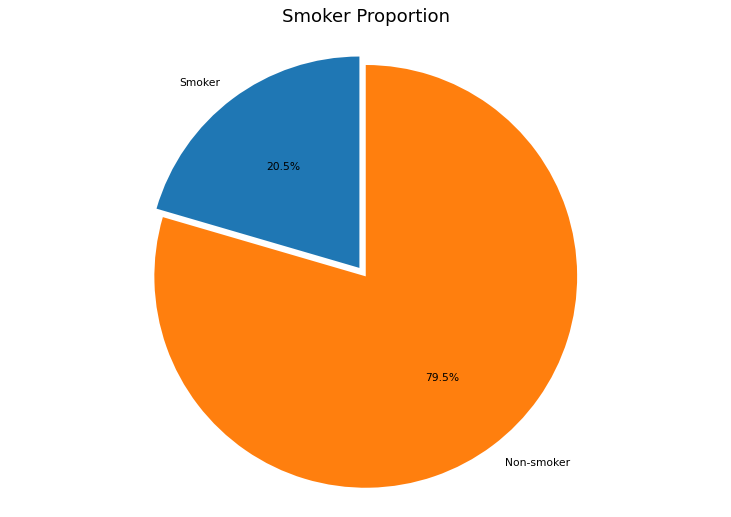

In [ ]:
#Pie chart

yes = (df['smoker'] == 1).sum()
no = (df['smoker']== 0).sum()
proportions = [yes,no]
print(proportions)
print("Show")
plt.figure(figsize=(12,8), dpi=77)
plt.pie(proportions, data=df, labels= ['Smoker', 'Non-smoker'], explode = (0.05,0), startangle=90, autopct='%1.1f%%', shadow=False)
plt.axis('equal')
plt.title("Smoker Proportion", size=17, pad=13)
plt.show()


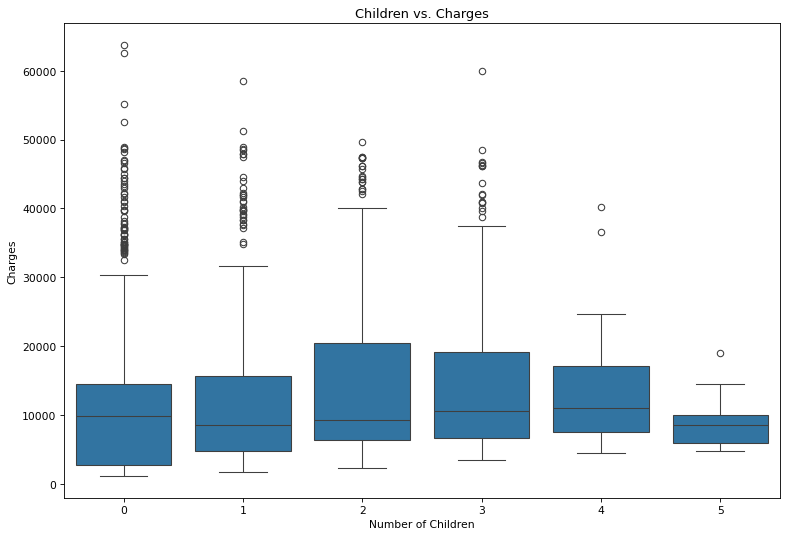

In [ ]:
#Box plot
plt.figure(figsize=(12, 8), dpi=77)
sns.boxplot(x='children', y='charges', data=df)
plt.title("Children vs. Charges")
plt.xlabel('Number of Children')
plt.ylabel('Charges')
plt.show()

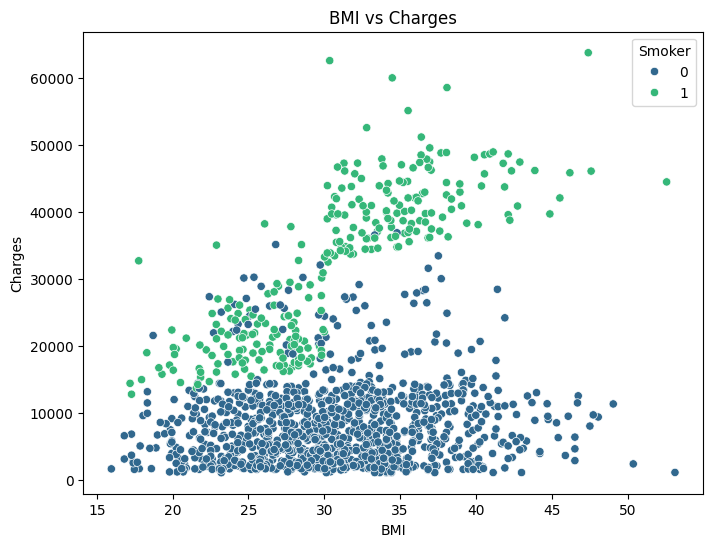

In [ ]:
#Scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='bmi', y='charges', data=df, hue='smoker', palette='viridis')
plt.title("BMI vs Charges")
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.legend(title='Smoker')
plt.show()

In [ ]:
X=df.drop(columns=['charges'])
Y=df['charges']

In [ ]:
X = X.dropna()
Y = Y[X.index]


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [ ]:
from sklearn.linear_model import  LinearRegression

In [ ]:
model= LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)
y_pred

array([ 1885.54165174, 11944.32273357, 10455.55488707,  2397.96696161,
        8271.55347048, 11234.41036809,  3376.43169724,  1072.63123623,
       12060.51395933,  9468.23322457, 11494.97066851,  5053.0305502 ,
       30093.5527384 ,  -228.58148206, 12784.84199754, 13402.21956446,
        4179.28948043,  7740.09899682, 29568.66245635,  2738.01455718,
       12343.38521075,  1881.51269934, 34087.95253065, 32103.24119851,
       30445.32061394,  8632.58788645,  2298.01995336, 15417.01187725,
        6168.10928884,  1942.95830544,  9636.84483913,  5642.81556233,
        4058.10854408,  4853.19902886,  9764.94270973,  4755.04190386,
       30007.20570516,  6403.4791383 , 27582.56773006, 14149.40158117,
         151.96770571, 28000.88252814,  7724.4555082 ,  1093.99727743,
       10434.24794603,  7636.92275042, 11467.16787872,  8328.38879353,
       10915.23415866, 13408.79328   ,  6150.60763788, -1131.05313916,
       26163.22877049, 36999.48645124,  6988.24506067, 17480.13399005,
      

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error, classification_report, r2_score
from sklearn.linear_model import LogisticRegression

In [ ]:
mae = mean_absolute_error(Y_test, y_pred)
mse = mean_squared_error(Y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(Y_test, y_pred)

In [ ]:
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2) Score: {r2:.2f}")

Mean Absolute Error (MAE): 4285.22
Mean Squared Error (MSE): 38364832.19
Root Mean Squared Error (RMSE): 6193.94
R-squared (R2) Score: 0.74
